# https://www.kaggle.com/c/petfinder-adoption-prediction/data
## Phase 1 Objectives:
### Exploratory analysis, data cleaning, feature engineering
### Create binary classification models to determine if a pet will be adopted or not
### Calculate some accuracy statistics, ROC, etc
### Interpret impact of different input variables (if applicable to model selected)

## Phase 2 Objectives:
### implement NLP for description field
### predict adoption speed instead of just yes/no (survival?)



#### Import libraries and Read in data

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.figure(figsize=(25,10))

train = pd.read_csv('train.csv')

train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


<Figure size 1800x720 with 0 Axes>

In [27]:
train.dtypes

Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
dtype: object

In [28]:
train = train.drop(['RescuerID', 'State', 'Name', 'Description', 'Breed1', 'Breed2', 'PetID', 'Color2', 'Color3'],axis = 1)

#bring back in description for phase 2, for now don't need
#breed is probably important.. but will be complicated with so many levels, so leaving out for now. bring back though!


#IDEAS FOR LATER:
#purebreds only have one breed listed, mutts have multiple. make a new variable for purebred vs mutt? ONLY FOR DOGS
#the name itself is probably worthless, but could make variable if pet has been named or not. lots of no-names in data.

In [29]:
#only want records for a single pet adoption, once filtered don't need Quantity
train = train[train.Quantity == 1]

train = train.drop(['Quantity'],axis = 1)

In [30]:
#changing adoption speed (0,1,2,3,4) to just a binary yes or no
#for phase 2 will use adpotion speed

train['Adopted'] = np.where(train['AdoptionSpeed']==4, 0, 1)
train = train.drop(['AdoptionSpeed'],axis = 1)
train.head()

,Type,Age,Gender,Color1,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,VideoAmt,PhotoAmt,Adopted
0,2,3,1,1,1,1,2,2,2,1,100,0,1.0,1
1,2,1,1,1,2,2,3,3,3,1,0,0,2.0,1
2,1,1,1,2,2,2,1,1,2,1,0,0,7.0,1
3,1,4,2,1,2,1,1,1,2,1,150,0,8.0,1
4,1,1,1,1,2,1,2,2,2,1,0,0,3.0,1


In [31]:
#annoying that photo is float... changing for my own sanity
train.PhotoAmt = train.PhotoAmt.astype(int)
train.head()

,Type,Age,Gender,Color1,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,VideoAmt,PhotoAmt,Adopted
0,2,3,1,1,1,1,2,2,2,1,100,0,1,1
1,2,1,1,1,2,2,3,3,3,1,0,0,2,1
2,1,1,1,2,2,2,1,1,2,1,0,0,7,1
3,1,4,2,1,2,1,1,1,2,1,150,0,8,1
4,1,1,1,1,2,1,2,2,2,1,0,0,3,1


In [32]:
train.shape

(11565, 14)

In [33]:
train.info()
#no null values!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11565 entries, 0 to 14992
Data columns (total 14 columns):
Type            11565 non-null int64
Age             11565 non-null int64
Gender          11565 non-null int64
Color1          11565 non-null int64
MaturitySize    11565 non-null int64
FurLength       11565 non-null int64
Vaccinated      11565 non-null int64
Dewormed        11565 non-null int64
Sterilized      11565 non-null int64
Health          11565 non-null int64
Fee             11565 non-null int64
VideoAmt        11565 non-null int64
PhotoAmt        11565 non-null int32
Adopted         11565 non-null int32
dtypes: int32(2), int64(12)
memory usage: 1.2 MB


In [34]:
colnames = list(train)

for i in colnames:
    print (train[i].value_counts())
    #print (train[i].value_counts().plot(kind='bar')) 
    
#loop to print bar charts for each variable doesn't work for some reason. only prints last graph.
#revisit later... likely a jupyter issue


#IMPORTANT TAKEAWAYS:
#need to clean up Age variable!
#bucket the fees maybe?
#sterilized vaccinated dewormed etc... value 3 = unknown. group those with nos maybe to make binary?

1    6622
2    4943
Name: Type, dtype: int64
2      2523
3      1502
1      1416
4       889
12      836
24      557
5       489
6       477
36      368
8       270
7       244
48      218
60      182
9       164
18      141
10      141
72       98
84       95
11       84
0        78
15       70
14       67
17       56
30       46
96       40
13       37
16       35
120      29
20       28
21       26
       ... 
57        2
255       2
45        2
212       2
180       2
81        1
117       1
95        1
87        1
156       1
100       1
92        1
68        1
44        1
135       1
88        1
86        1
69        1
85        1
147       1
168       1
123       1
91        1
75        1
102       1
238       1
122       1
82        1
74        1
66        1
Name: Age, Length: 105, dtype: int64
2    6478
1    5087
Name: Gender, dtype: int64
1    5261
2    3078
3     791
5     766
7     593
6     576
4     500
Name: Color1, dtype: int64
2    8016
1    2480
3    1041
4      28
Na

In [35]:
train = train[train.Age < 18]
train.shape
#age shouldn't be above this number, not sure why so many are, but filtering out

(9378, 14)

In [36]:
#if MaturitySize, Health, or FurLength is not specified - filter out for now

train = train[(train.MaturitySize != 0) & (train.Health != 0) & (train.FurLength != 0)]

In [37]:
train['Vaccinated'] = np.where(train['Vaccinated']==1, 1, 0)
train['Sterilized'] = np.where(train['Sterilized']==1, 1, 0)
train['Dewormed'] = np.where(train['Dewormed']==1, 1, 0)
#converting these 3 to binary. if unknown will consider this a no now

#so few are in the critically injured category, making this just a healthy/nonhealthy binary
train['Health'] = np.where(train['Health']==1, 1, 0)
train.head()

,Type,Age,Gender,Color1,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,VideoAmt,PhotoAmt,Adopted
0,2,3,1,1,1,1,0,0,0,1,100,0,1,1
1,2,1,1,1,2,2,0,0,0,1,0,0,2,1
2,1,1,1,2,2,2,1,1,0,1,0,0,7,1
3,1,4,2,1,2,1,1,1,0,1,150,0,8,1
4,1,1,1,1,2,1,0,0,0,1,0,0,3,1


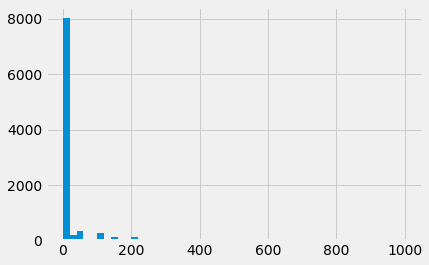

In [43]:
#not sure if I want to bin the fee variable. going to leave it as continuous for now, may edit later.

train.Fee.hist(bins=50);

In [44]:
train.head(15)

,Type,Age,Gender,Color1,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,VideoAmt,PhotoAmt,Adopted
0,2,3,1,1,1,1,0,0,0,1,100,0,1,1
1,2,1,1,1,2,2,0,0,0,1,0,0,2,1
2,1,1,1,2,2,2,1,1,0,1,0,0,7,1
3,1,4,2,1,2,1,1,1,0,1,150,0,8,1
4,1,1,1,1,2,1,0,0,0,1,0,0,3,1
5,2,3,2,5,2,1,0,0,0,1,0,0,2,1
6,2,12,1,1,2,3,0,0,0,1,300,0,3,1
8,2,2,2,6,2,2,0,0,0,1,0,0,6,1
9,2,12,2,1,2,2,0,0,0,1,0,0,2,0
10,1,2,1,1,2,1,0,1,0,1,0,0,7,1


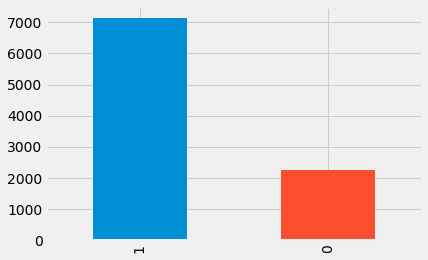

In [45]:
#visualize the target variable

train.Adopted.value_counts().plot(kind='bar'); 
#not super balanced

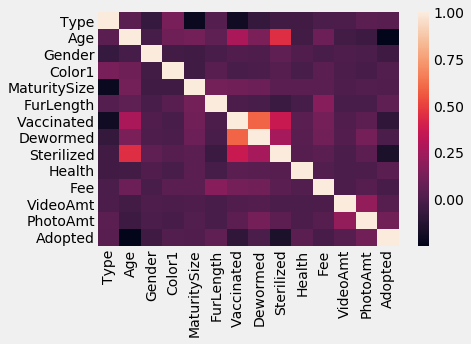

In [46]:
sns.heatmap(train.corr())
#nothing super correlated with adopted

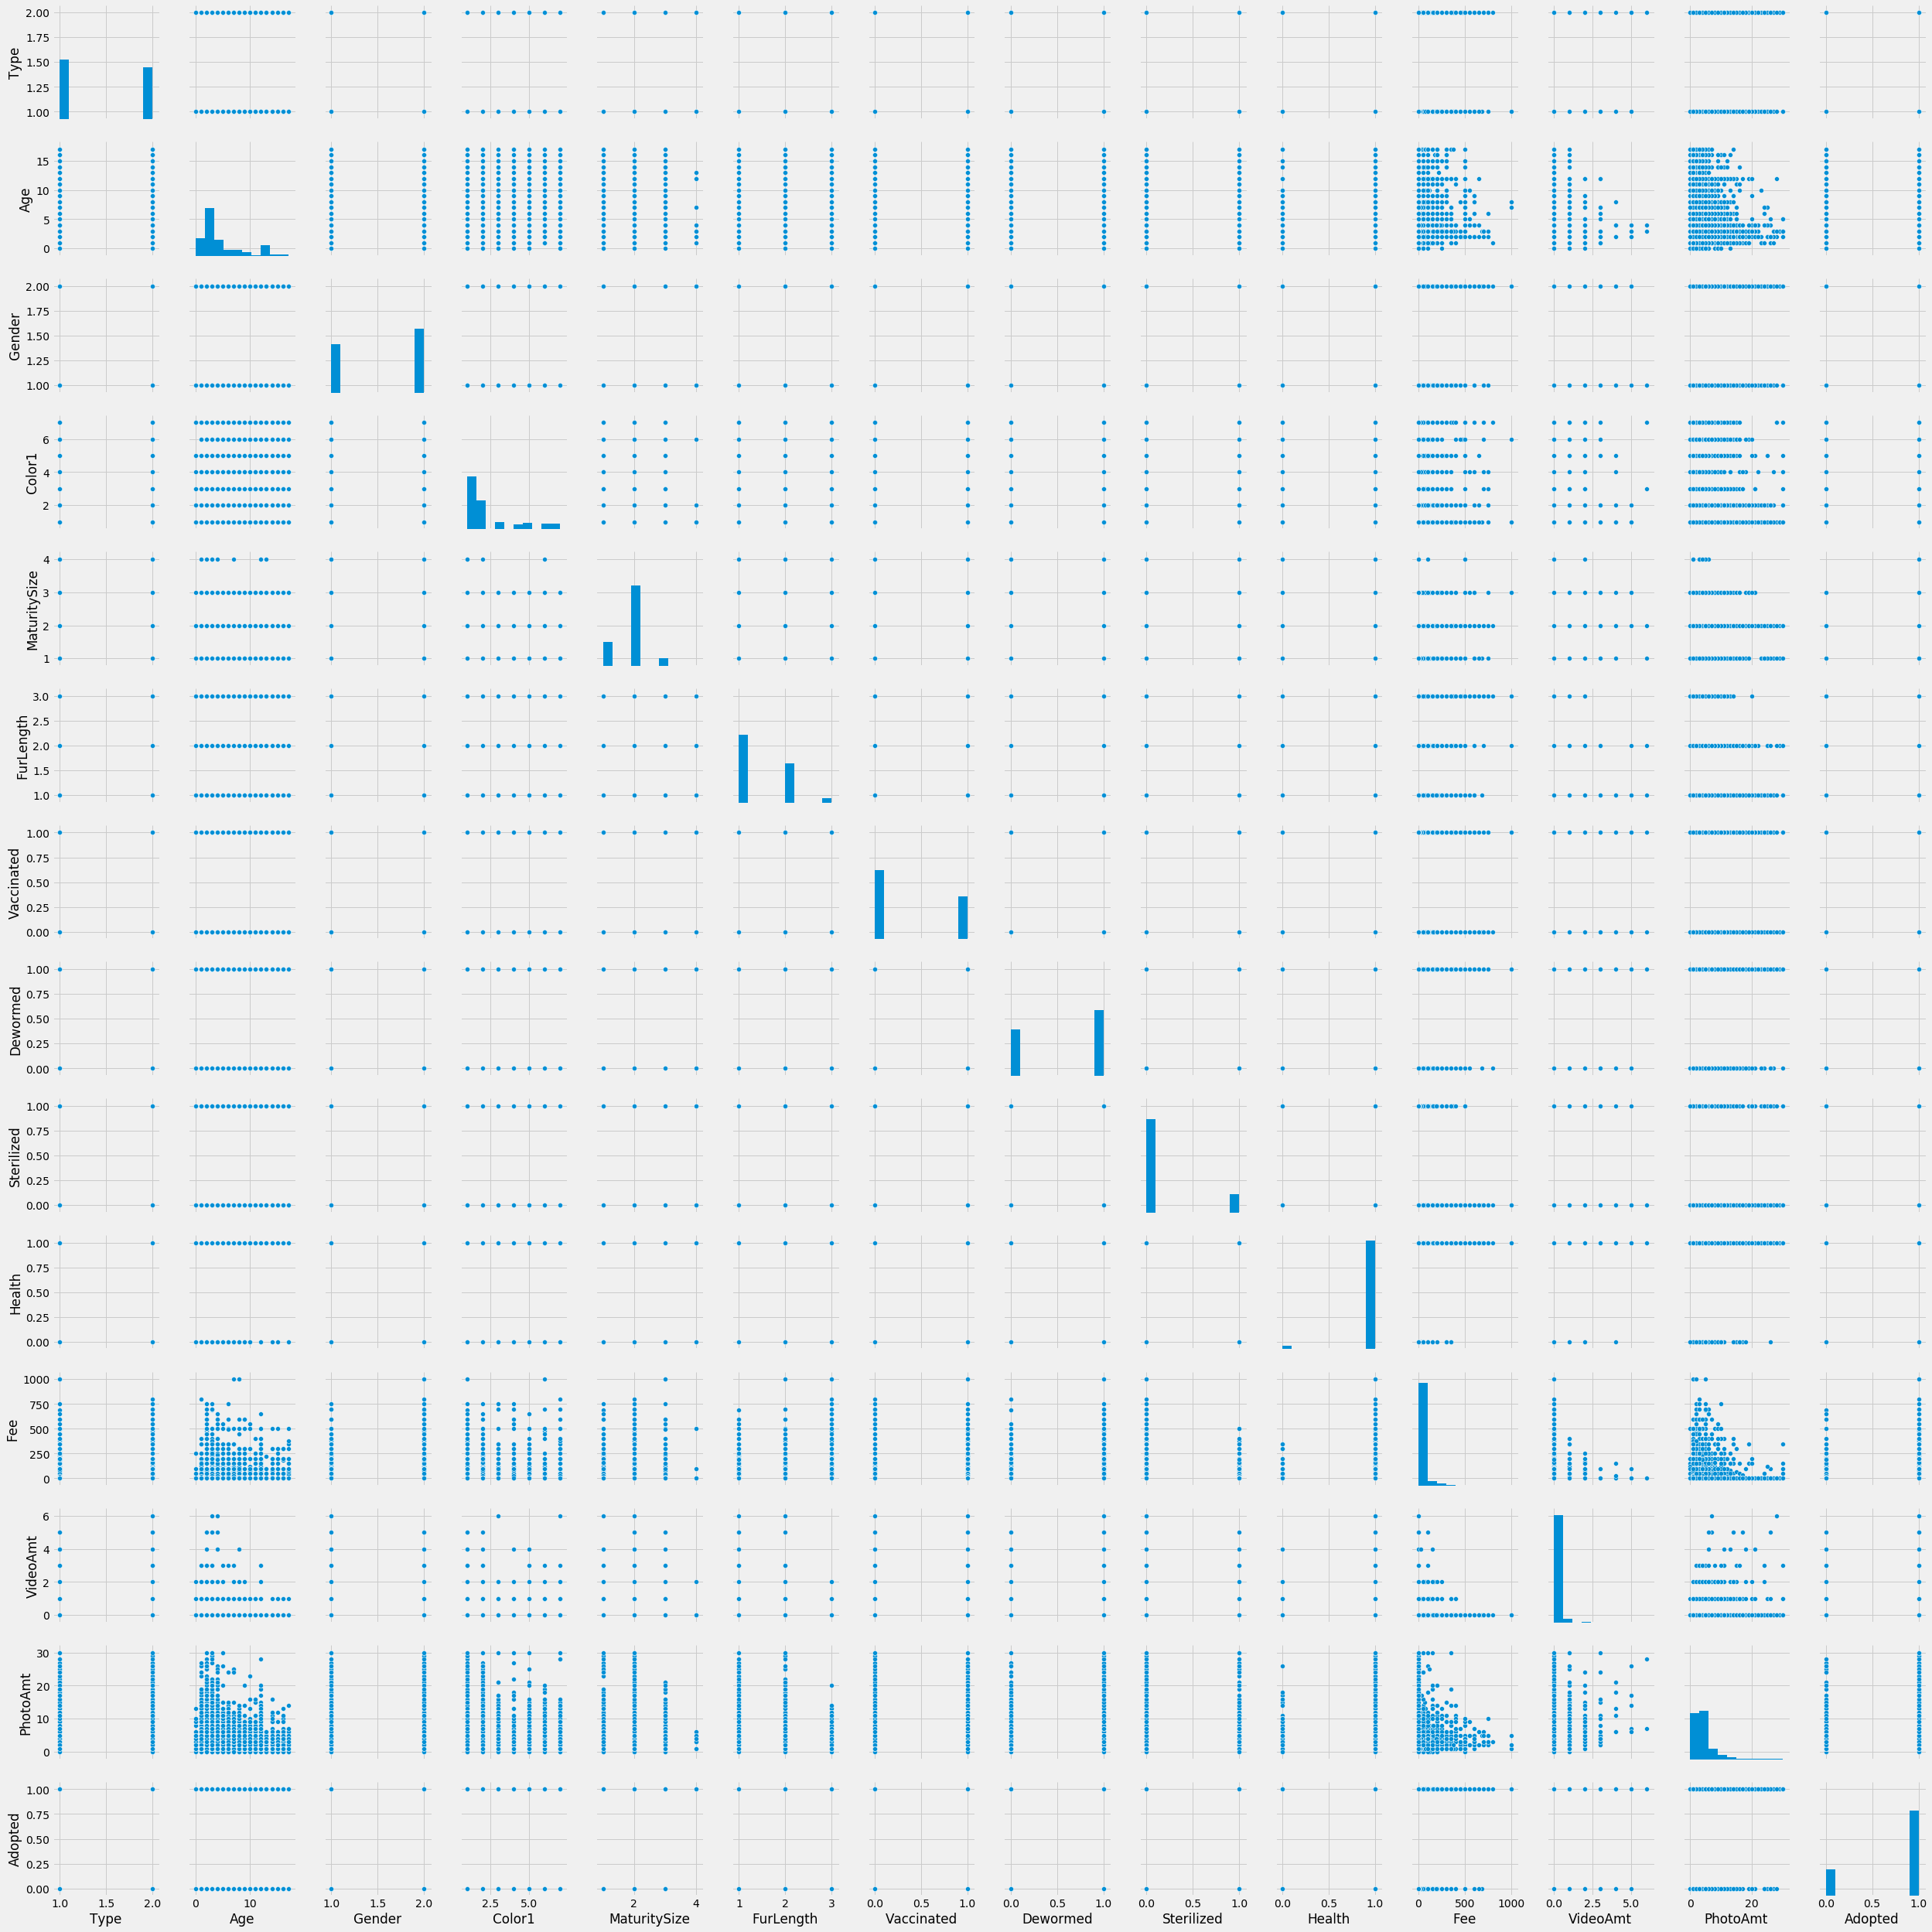

In [47]:
sns.pairplot(train);
#so ugly